In [3]:
import wfdb

In [ ]:
fetal_ecg = 'sub02_snr00dB_l1_c0_fecg1'

mom_ecg = 'sub02_snr00dB_l1_c0_mecg'

sinal = wfdb.rdrecord(fetal_ecg)
mom_sinal = wfdb.rdrecord(mom_ecg)

qrs = wfdb.rdann(fetal_ecg,'qrs')
mom_qrs = wfdb.rdann(mom_ecg,'qrs')

# Access the ECG signals
ecg_signals = sinal.p_signal  # 2D numpy array [samples, channels]
mom_signals = mom_sinal.p_signal
fs = sinal.fs  # sampling frequency

# Access annotations
r_peak_locations = qrs.sample  # sample indices of R-peaks 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/carolinaantunes/Desktop/2º semestre/ICSTS/icsts-project/sub02_snr00dB_l1_c0_fecg1.hea'

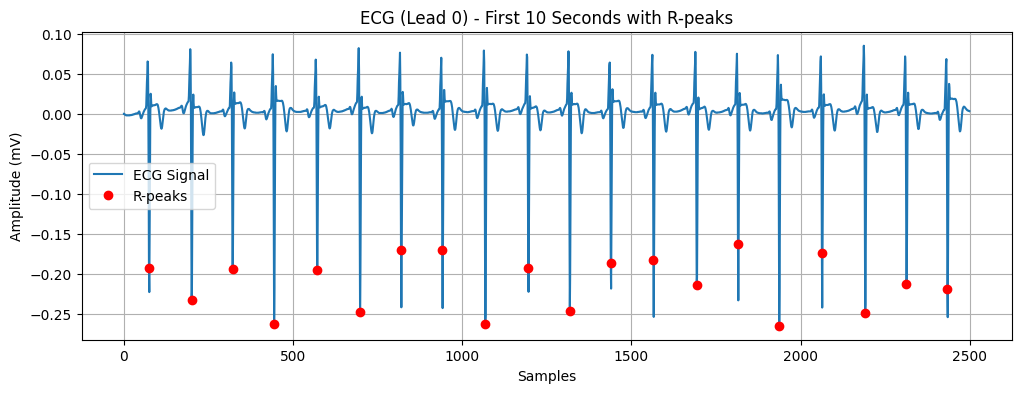

In [ ]:
import matplotlib.pyplot as plt

seconds = 10
fs = sinal.fs  # Make sure 'record' is the correct object
start = 0
end = int(seconds * fs)

# Limit R-peak locations to the time window
r_peaks_in_window = [r for r in r_peak_locations if start <= r < end]

plt.figure(figsize=(12, 4))
plt.plot(ecg_signals[start:end, 4], label='ECG Signal')

# Plot R-peaks only within the selected window
plt.plot(
    [r - start for r in r_peaks_in_window],  # shift indices to match sliced signal
    ecg_signals[r_peaks_in_window, 4],
    'ro',
    label='R-peaks'
)

plt.legend()
plt.title(f'ECG (Lead 0) - First {seconds} Seconds with R-peaks')
plt.xlabel('Samples')
plt.ylabel('Amplitude (mV)')
plt.grid()
plt.show()


In [ ]:
seconds = 10
fs = sinal.fs  # sampling rate
start = 0
end = int(seconds * fs)

plt.figure(figsize=(12, 4))
plt.plot(ecg_signals[start:end, 1])  # Plot channel 0
plt.title(f"ECG Lead 0 - First {seconds} seconds")
plt.xlabel("Samples")
plt.ylabel("Amplitude (mV)")
plt.grid()
plt.show()


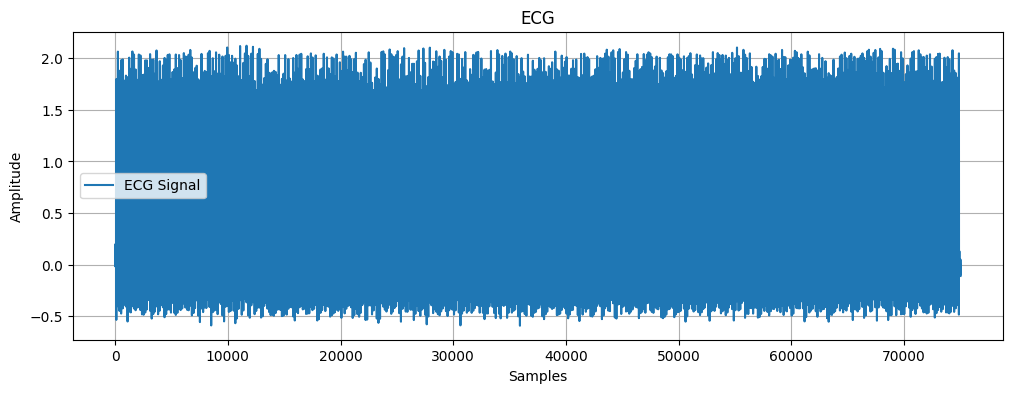

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(mom_signals[:, 0], label='ECG Signal')
plt.legend()
plt.title('ECG')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


In [ ]:
import wfdb
import numpy as np

# Load maternal and fetal ECGs
maternal = wfdb.rdrecord('sub02_snr00dB_l1_c0_fecg1')  # path to maternal ECG
fetal = wfdb.rdrecord('sub02_snr00dB_l1_c0_mecg')        # path to fetal ECG

# Extract signals (assuming 1 channel each)
m_ecg = maternal.p_signal[:, 0]
f_ecg = fetal.p_signal[:, 0]

# Check sampling frequency
assert maternal.fs == fetal.fs, "Sampling frequencies must match"
fs = maternal.fs


min_len = min(len(m_ecg), len(f_ecg))
m_ecg = m_ecg[:min_len]
f_ecg = f_ecg[:min_len]

combined_ecg = np.stack((m_ecg, f_ecg), axis=1)  # shape: (samples, 2)


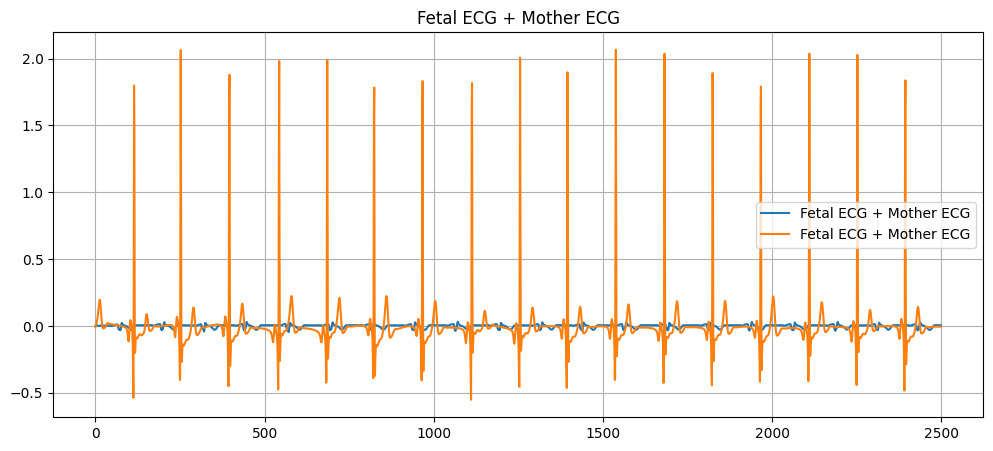

In [ ]:


plt.figure(figsize=(12, 5))
plt.plot(combined_ecg[:fs*10], label='Fetal ECG + Mother ECG')
plt.legend()
plt.title("Fetal ECG + Mother ECG")
plt.grid()
plt.show()


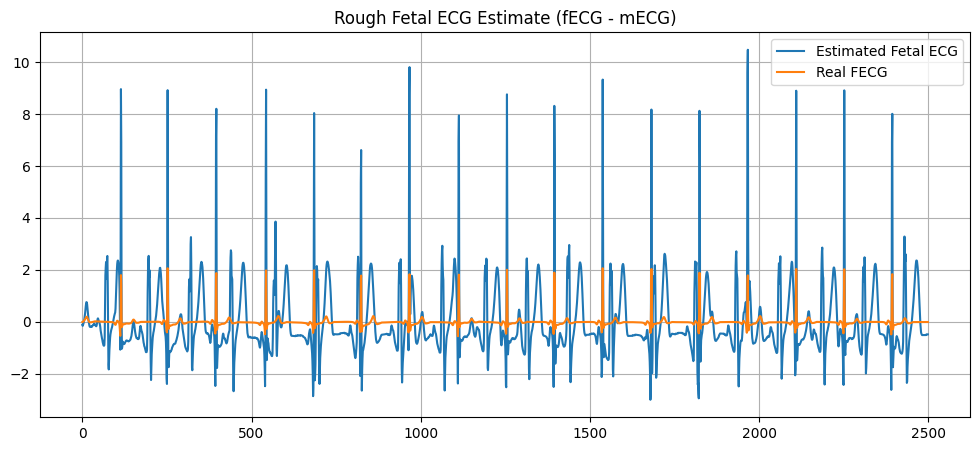

In [ ]:
# Normalize both signals first
m_norm = (m_ecg - np.mean(m_ecg)) / np.std(m_ecg)
f_norm = (f_ecg - np.mean(f_ecg)) / np.std(f_ecg)

# Subtract maternal influence
fetal_estimate = f_norm - m_norm


plt.figure(figsize=(12, 5))
plt.plot(fetal_estimate[:fs*10], label='Estimated Fetal ECG')
plt.plot(f_ecg[:fs*10], label='Real FECG')
plt.legend()
plt.title("Rough Fetal ECG Estimate (fECG - mECG)")
plt.grid()
plt.show()


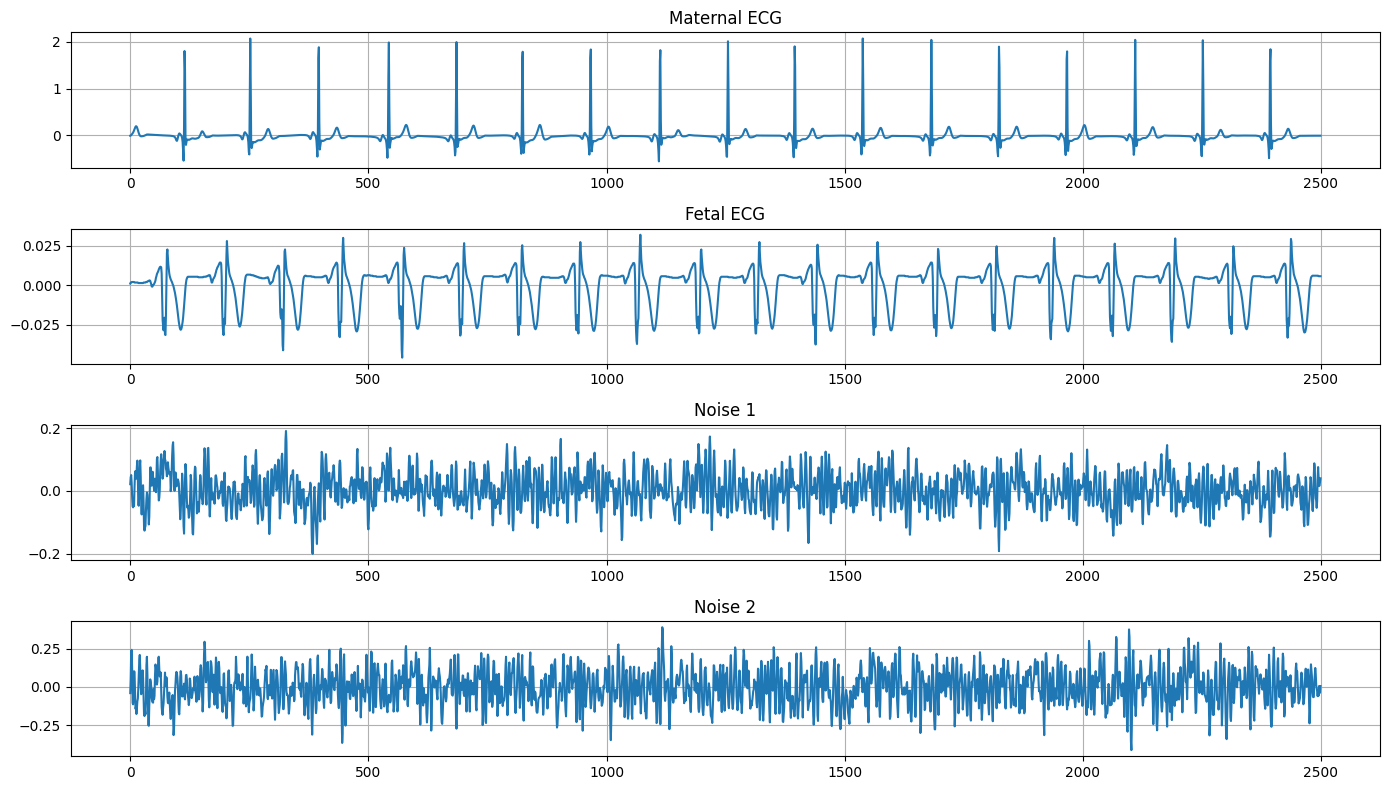

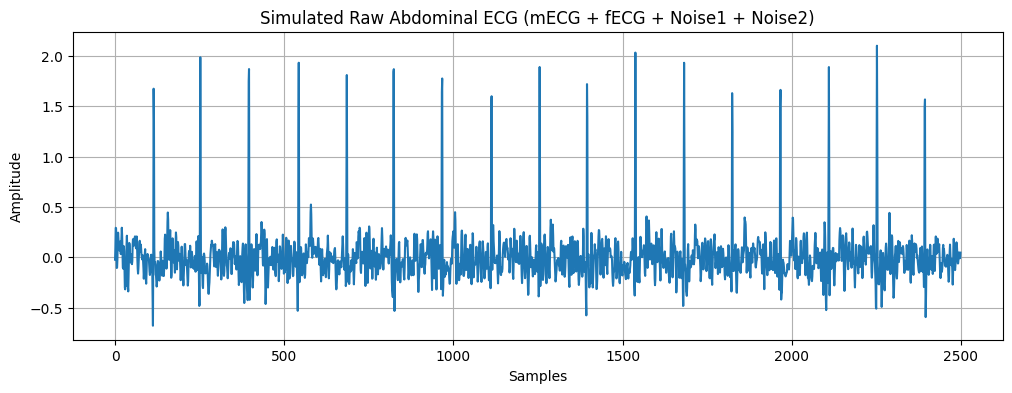

In [ ]:
import wfdb
import numpy as np

# Load all recordings
fetal = wfdb.rdrecord('sub02_snr00dB_l1_c0_fecg1')  
maternal = wfdb.rdrecord('sub02_snr00dB_l1_c0_mecg') 
noise1 = wfdb.rdrecord('sub02_snr00dB_l1_c0_noise1')
noise2 = wfdb.rdrecord('sub02_snr00dB_l1_c0_noise2')

# Extract signals (assuming one channel each)
m_ecg = maternal.p_signal[:, 0]
f_ecg = fetal.p_signal[:, 0]
n1 = noise1.p_signal[:, 0]
n2 = noise2.p_signal[:, 0]

# Ensure same sampling frequency
fs = maternal.fs
assert fs == fetal.fs == noise1.fs == noise2.fs, "Sampling rates must match"


# Trim to the shortest length
min_len = min(len(m_ecg), len(f_ecg), len(n1), len(n2))
m_ecg = m_ecg[:min_len]
f_ecg = f_ecg[:min_len]
n1 = n1[:min_len]
n2 = n2[:min_len]

combined_signals = np.stack((m_ecg, f_ecg, n1, n2), axis=1)  # shape: (samples, 4)

import matplotlib.pyplot as plt

labels = ['Maternal ECG', 'Fetal ECG', 'Noise 1', 'Noise 2']

plt.figure(figsize=(14, 8))
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(combined_signals[:fs*10, i])
    plt.title(labels[i])
    plt.grid()

plt.tight_layout()
plt.show()


# Combine all signals into a single "observed" abdominal-like signal
mixed_signal = m_ecg + f_ecg + n1 + n2



plt.figure(figsize=(12, 4))
plt.plot(mixed_signal[:fs*10])  # First 10 seconds
plt.title("Simulated Raw Abdominal ECG (mECG + fECG + Noise1 + Noise2)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()
plt.show()



In [ ]:
print("Maternal channels:", maternal.n_sig)
print("Fetal channels:", fetal.n_sig)
print("Noise1 channels:", noise1.n_sig)
print("Noise2 channels:", noise2.n_sig)


Maternal channels: 34
Fetal channels: 34
Noise1 channels: 34
Noise2 channels: 34
